### DAI Machine Learning Interpretability (MLI)
API Document: https://docs.h2o.ai/driverless-ai/pyclient/docs/html/api/mli.html  
Examples: https://docs.h2o.ai/driverless-ai/pyclient/docs/html/examples/mli/access-explainer-data.html

In [1]:
import driverlessai
#from vega import Vega

driverlessai.__version__

'1.10.7'

In [2]:
# Driverless AIサーバーへの接続
dai = driverlessai.Client(address='http://18.143.93.66:12345', username='yuki', password='yuki')
dai

<class 'driverlessai._core.Client'> http://18.143.93.66:12345

In [3]:
# 接続先Driverless AIのDatasets
dai.datasets.list()

    | Type    | Key                                  | Name
----+---------+--------------------------------------+------------------------
  0 | Dataset | 7f133952-513b-11ef-8970-0242ac110002 | TitanicData2.csv.test
  1 | Dataset | 7f12e3f8-513b-11ef-8970-0242ac110002 | TitanicData2.csv.train
  2 | Dataset | 6d8b4260-513b-11ef-8970-0242ac110002 | TitanicData2.csv

In [4]:
# 接続先Driverless AIのExperiments
dai.experiments.list()

    | Type       | Key                                  | Name
----+------------+--------------------------------------+-----------------
  0 | Experiment | 9d52d684-513b-11ef-8970-0242ac110002 | titanic-default

In [5]:
# 特定のExperimentの取得
experiment = dai.experiments.get(key=dai.experiments.list()[0].key)     # titanic-defaultを取得
type(experiment)

driverlessai._experiments.Experiment

### MLI

In [6]:
dai.mli.list()

    | Type   | Key   | Name
----+--------+-------+--------

In [7]:
# MLIの実行
interpretation = dai.mli.create(
    experiment=experiment,
    name="mli-test"
)

/opt/anaconda3/envs/ML/lib/python3.10/site-packages/driverlessai/_commons_mli.py:273: FutureWarning: IIDMethods functionality will be migrated to driverlessai._mli.MLI
  existing_names = [i.name for i in client.mli.iid.list()]


Complete 100.00% - Interpretation successfully finished.


In [8]:
interpretation

<class 'Interpretation'> 494a60f6-5ab5-11ef-ac0a-0242ac110002 mli-test

In [9]:
interpretation.explainers

/var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/ipykernel_6128/2428974936.py:1: UserWarning: 'Interpretation.explainers' is a beta API that is subject to future changes.
  interpretation.explainers


,Key,Name
0,49837c1a-5ab5-11ef-ac0a-0242ac110002,Disparate Impact Analysis
1,49839088-5ab5-11ef-ac0a-0242ac110002,Sensitivity Analysis
2,498392f4-5ab5-11ef-ac0a-0242ac110002,Shapley Values for Original Features (Naive Method)
3,4983951a-5ab5-11ef-ac0a-0242ac110002,Shapley Summary Plot for Original Features (Naive Shapley Method)
4,498396aa-5ab5-11ef-ac0a-0242ac110002,Shapley Values for Transformed Features
5,49839830-5ab5-11ef-ac0a-0242ac110002,Decision Tree
6,498399ac-5ab5-11ef-ac0a-0242ac110002,NLP Leave-one-covariate-out (LOCO)
7,49839b3c-5ab5-11ef-ac0a-0242ac110002,NLP Partial Dependence Plot
8,49839cae-5ab5-11ef-ac0a-0242ac110002,Partial Dependence Plot


In [10]:
dai.mli.list()

    | Type           | Key                                  | Name
----+----------------+--------------------------------------+----------
  0 | Interpretation | 494a60f6-5ab5-11ef-ac0a-0242ac110002 | mli-test

【作成したMLI】
<img src="img/mli.png" width=800px>

In [11]:
native_shaply = interpretation.explainers[2]
native_shaply

/var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/ipykernel_6128/2287243191.py:1: UserWarning: 'Interpretation.explainers' is a beta API that is subject to future changes.
  native_shaply = interpretation.explainers[2]


<class 'Explainer'> 494a60f6-5ab5-11ef-ac0a-0242ac110002/498392f4-5ab5-11ef-ac0a-0242ac110002 Shapley Values for Original Features (Naive Method)

In [12]:
native_shaply.explanation_plots[0].get_plot()    # vega-lite/v3 形式

{'title': {'text': 'Shapley Values for Original Features (Naive Method)',
  'subtitle': 'Global bias: -0.52636, Target Transformation: LabelEncoder',
  'align': 'right'},
 '$schema': 'https://vega.github.io/schema/vega-lite/v5.json',
 'width': 600,
 'height': 180,
 'data': {'values': [{'label': 'sex',
    'value': 1.218333,
    'scope': 'global',
    'value+bias': 0.6919745743827821},
   {'label': 'pclass',
    'value': 0.325957,
    'scope': 'global',
    'value+bias': -0.20040142561721802},
   {'label': 'age',
    'value': 0.254291,
    'scope': 'global',
    'value+bias': -0.27206742561721803},
   {'label': 'fare',
    'value': 0.238655,
    'scope': 'global',
    'value+bias': -0.287703425617218},
   {'label': 'cabin',
    'value': 0.208265,
    'scope': 'global',
    'value+bias': -0.318093425617218},
   {'label': 'sibsp',
    'value': 0.092146,
    'scope': 'global',
    'value+bias': -0.434212425617218}]},
 'encoding': {'y': {'field': 'label',
   'type': 'nominal',
   'sort': {'

In [80]:
type(native_shaply.explanation_plots[0].get_plot())

dict

In [19]:
## 参考：https://github.com/jupyterlab/jupyterlab/tree/main/examples/vega ##
from IPython.display import display
def VegaLite_display(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)

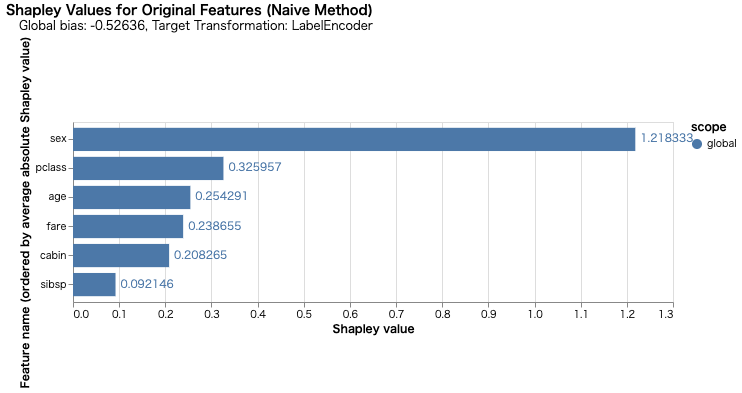

In [14]:
VegaLite_display(native_shaply.explanation_plots[0].get_plot())

In [15]:
pdp = interpretation.explainers[8]
pdp

/var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/ipykernel_6128/3207575695.py:1: UserWarning: 'Interpretation.explainers' is a beta API that is subject to future changes.
  pdp = interpretation.explainers[8]


<class 'Explainer'> 494a60f6-5ab5-11ef-ac0a-0242ac110002/49839cae-5ab5-11ef-ac0a-0242ac110002 Partial Dependence Plot

In [16]:
pdp.explanation_plots[0].get_plot()

{'title': {'text': 'Partial Dependence Plot',
  'subtitle': '',
  'align': 'center'},
 '$schema': 'https://vega.github.io/schema/vega-lite/v5.json',
 'vconcat': [{'width': 800,
   'height': 300,
   'data': {'values': [{'bin': 0,
      'pd': 0.39888817071914673,
      'sd': 0.3316114842891693,
      'oor': False,
      'band_top': 0.730499655008316,
      'band_bottom': 0.06727668642997742},
     {'bin': 1,
      'pd': 0.39581748843193054,
      'sd': 0.3313959240913391,
      'oor': False,
      'band_top': 0.7272134125232697,
      'band_bottom': 0.06442156434059143},
     {'bin': 2,
      'pd': 0.4040237069129944,
      'sd': 0.3328492343425751,
      'oor': False,
      'band_top': 0.7368729412555695,
      'band_bottom': 0.07117447257041931},
     {'bin': 3,
      'pd': 0.2675727903842926,
      'sd': 0.3120537996292114,
      'oor': False,
      'band_top': 0.579626590013504,
      'band_bottom': -0.04448100924491882},
     {'bin': 4,
      'pd': 0.26599565148353577,
      'sd': 0

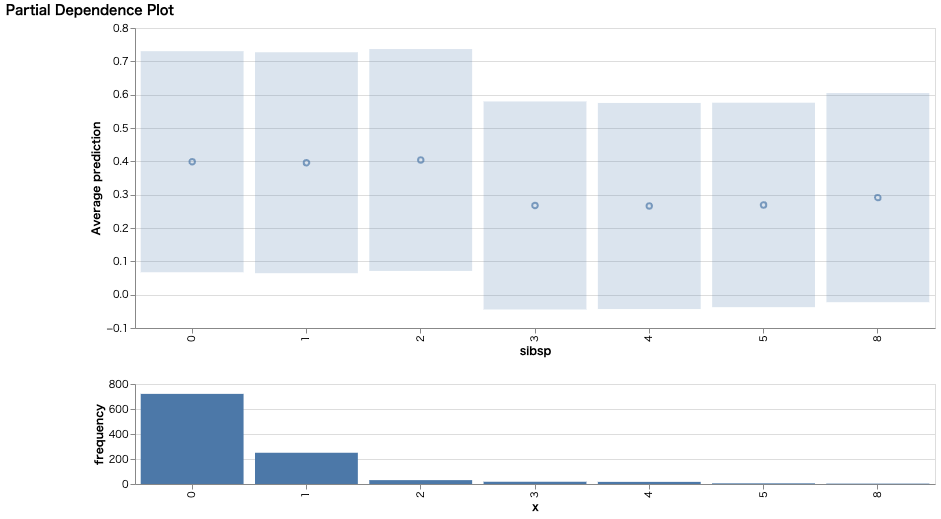

In [18]:
VegaLite_display((pdp.explanation_plots[0].get_plot()))

#### 任意のExplainerの実行

In [20]:
dai.recipes.explainers.list()

    | Type            | Key   | Name
----+-----------------+-------+-------------------------------------------------------------------
  0 | ExplainerRecipe |       | Absolute Permutation-Based Feature Importance
  1 | ExplainerRecipe |       | AutoDoc
  2 | ExplainerRecipe |       | Decision Tree
  3 | ExplainerRecipe |       | Disparate Impact Analysis
  4 | ExplainerRecipe |       | Friedman's H-statistic
  5 | ExplainerRecipe |       | Interpretability Data Zip (Surrogate and Shapley Techniques)
  6 | ExplainerRecipe |       | NLP Leave-one-covariate-out (LOCO)
  7 | ExplainerRecipe |       | NLP Partial Dependence Plot
  8 | ExplainerRecipe |       | NLP Tokenizer
  9 | ExplainerRecipe |       | NLP Vectorizer + Linear Model (VLM) Text Feature Importance
 10 | ExplainerRecipe |       | Original Feature Importance
 11 | ExplainerRecipe |       | Partial Dependence Plot
 12 | ExplainerRecipe |       | Partial Dependence Plot for Two Features
 13 | ExplainerRecipe |       | Relative

In [21]:
dai.recipes.explainers.list()[10]

<class 'ExplainerRecipe'> Original Feature Importance

In [22]:
explainers = [dai.recipes.explainers.list()[10]]

In [23]:
interpretation2 = dai.mli.create(
    experiment=experiment,
    explainers=explainers,
    name="mli-test2"
)

Complete 100.00% - Interpretation successfully finished.


In [24]:
dai.mli.list()

    | Type           | Key                                  | Name
----+----------------+--------------------------------------+-----------
  0 | Interpretation | d937a412-5ab5-11ef-ac0a-0242ac110002 | mli-test2
  1 | Interpretation | 494a60f6-5ab5-11ef-ac0a-0242ac110002 | mli-test

In [25]:
interpretation2.explainers

/var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/ipykernel_6128/45200515.py:1: UserWarning: 'Interpretation.explainers' is a beta API that is subject to future changes.
  interpretation2.explainers


,Key,Name
0,d970970e-5ab5-11ef-ac0a-0242ac110002,Original Feature Importance


<img src="img/mli2.png" width=800px>

In [28]:
interpretation2.explainers[0]

/var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/ipykernel_6128/1828882939.py:1: UserWarning: 'Interpretation.explainers' is a beta API that is subject to future changes.
  interpretation2.explainers[0]


<class 'Explainer'> d937a412-5ab5-11ef-ac0a-0242ac110002/d970970e-5ab5-11ef-ac0a-0242ac110002 Original Feature Importance

/var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/ipykernel_6128/2514469082.py:1: UserWarning: 'Interpretation.explainers' is a beta API that is subject to future changes.
  VegaLite_display(interpretation2.explainers[0].explanation_plots[0].get_plot())


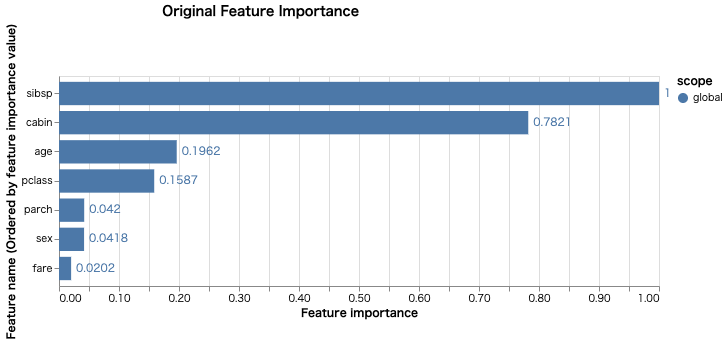

In [40]:
VegaLite_display(interpretation2.explainers[0].explanation_plots[0].get_plot())